In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [14]:
# loading crime data
data_crime = "https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/out.moreno_crime_crime"
crime = pd.read_csv(data_crime, delim_whitespace=True, header=None, skiprows=[0,1], names=['Person', 'Crime'])
# loading relationship data
data_rel = "https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/rel.moreno_crime_crime.person.role"
crime['Relationship'] = pd.read_csv(data_rel, header=None)

crime.head()

,Person,Crime,Relationship
0,1,1,Suspect
1,1,2,Victim
2,1,3,Victim
3,1,4,Suspect
4,2,5,Victim


In [15]:
# Total number of people
len(crime.Person.unique())

829

In [16]:
# Total number of crimes
len(crime.Crime.unique())

551

In [17]:
# Count of how many crimes each person was involved in 
crime.Person.value_counts().head()

815    25
2      22
425    18
220    17
56     14
Name: Person, dtype: int64

In [18]:
# adding count 
crime['Count'] = crime.groupby(['Person'])['Crime'].transform('count')
crime.head()

,Person,Crime,Relationship,Count
0,1,1,Suspect,4
1,1,2,Victim,4
2,1,3,Victim,4
3,1,4,Suspect,4
4,2,5,Victim,22


In [30]:
# loading name data
data_names = 'https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/ent.moreno_crime_crime.person.name'
names = pd.read_csv(data_names, sep='\t', header=None)

# loading sex data
data_sex = 'https://raw.githubusercontent.com/eriknylander99/DATA620_Group_Projects/master/data/moreno_crime/ent.moreno_crime_crime.person.sex'
names['Sex'] = pd.read_csv(data_sex, header=None)
names.ix[names.Sex == 1, 'Sex'] = 'M'
names.ix[names.Sex == 0, 'Sex'] = 'F'

# replacing left nodes (people involved in a crime) with names and adding sex
# Right nodes stay as numbers to identify as crimes, not people
for i in range(0,len(names)):
    crime.ix[crime.Person == i+1, 'Sex'] = names.iloc[i][1]
    crime.ix[crime.Person == i+1, 'Person'] = names.iloc[i][0]
    
crime.head()

,Person,Crime,Relationship,Count,Sex
0,AbelDennis,1,Suspect,4,M
1,AbelDennis,2,Victim,4,M
2,AbelDennis,3,Victim,4,M
3,AbelDennis,4,Suspect,4,M
4,AbramsChad,5,Victim,22,M


In [20]:
# Create graph
G = nx.Graph()
G = nx.from_pandas_dataframe(crime, 'Person', 'Crime', ['Relationship', 'Count', 'Sex'])

# a bit of info about the graph
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1380
Number of edges: 1476
Average degree:   2.1391


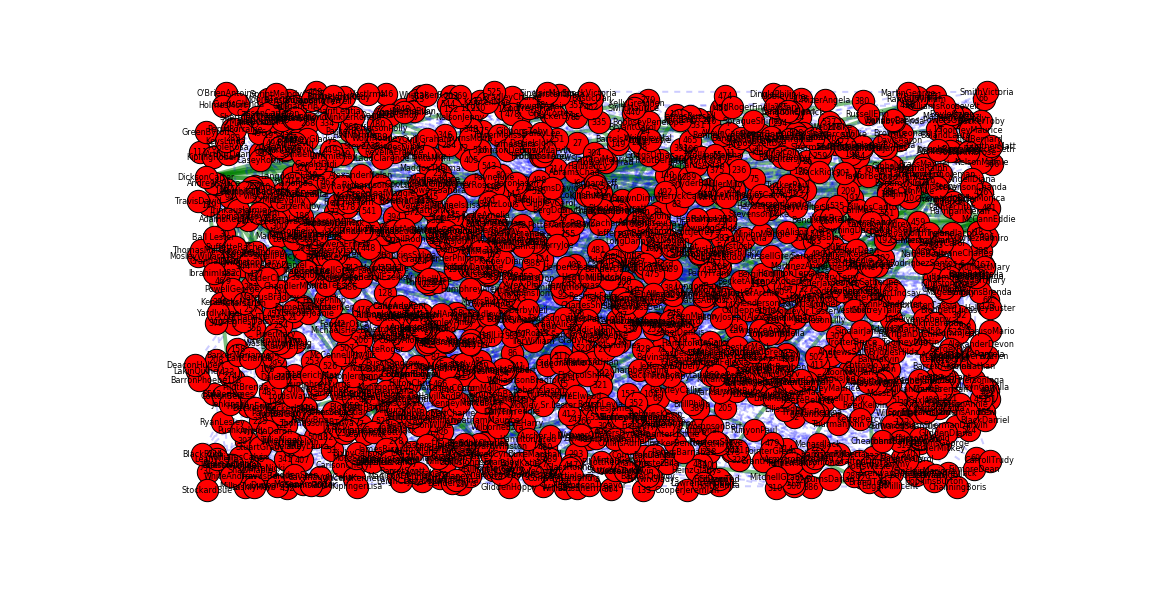

In [21]:
## plot the overall network
pos=nx.random_layout(G) # positions for all nodes

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['Count'] > 10]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['Count'] <= 10]

# nodes
nx.draw_networkx_nodes(G,pos,node_size=500)
# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=4,alpha=0.5,edge_color='g',style='solid')
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=2,alpha=0.2,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=8,font_family='sans-serif')

plt.axis('off')
plt.show()

In [22]:
## utility function to get topmost nodes for each centrality function
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x, items[:top])

# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)

# Degree centrality
deg_cen = nx.degree_centrality(G)

# Closeness centrality
clo_cen = nx.closeness_centrality(G)

# Eigenvector centrality
eig_cen = nx.eigenvector_centrality_numpy(G)

## get the top nodes
top_bet_cen = get_top_keys(bet_cen,10)
top_clo_cen = get_top_keys(clo_cen,10)
top_eig_cen = get_top_keys(eig_cen,10)
top_deg_cen = get_top_keys(deg_cen,10)

## smush them together to make a comparison chart
smush = np.hstack((top_bet_cen, top_clo_cen, top_eig_cen, top_deg_cen))

cent_measures=pd.DataFrame(smush, columns=['Node', 'Betweenness', 'Node', 'Closeness', 'Node', 'Eigenvector', 'Node', 'Degree'])

In [23]:
cent_measures

,Node,Betweenness,Node,Closeness,Node,Eigenvector,Node,Degree
0,WillisJenny,0.371301340152,47,0.10459398284,110,0.414920959003,WillisJenny,0.0181290790428
1,110,0.323802413821,SlatteryMaurice,0.10430116125,KatzLuella,0.414200419934,AbramsChad,0.0159535895577
2,SlatteryMaurice,0.254167041696,160,0.104197650534,SteinerCatherine,0.247706311047,110,0.0130529369108
3,23,0.252747859036,WillisJenny,0.104075584259,95,0.233381396842,KatzLuella,0.0130529369108
4,160,0.240850998043,23,0.10406620639,SmithMichaelThomas,0.220285657781,DicksonCarter,0.0123277737491
5,47,0.218627557343,AbramsChad,0.102962178704,417,0.183387969713,153,0.0108774474257
6,AbramsChad,0.189192601022,SteinerCatherine,0.102070416131,419,0.153482741794,BendixJerryLee,0.010152284264
7,46,0.178797977496,HemphillBud,0.101675038165,43,0.149970388001,14,0.00942712110225
8,14,0.168593116917,KarstenMae,0.101639246548,JohnstonJustin,0.142369334492,43,0.00942712110225
9,SteinerCatherine,0.156776034373,14,0.101416118592,MitchellGrant,0.138807303369,95,0.00942712110225


In [46]:
nx.is_connected(G), nx.is_bipartite(G)

(False, True)

In [49]:
## this is the more common way to do the same; women already are the top nodes, clubs on bottom
person, crime = nx.bipartite.sets(G)

In [50]:
print ""
print "Person"
print "------------------"
for i in range(len(crime)):
    print '%s    ' % (list(crime)[i])


Women
------------------
1    
2    
3    
4    
5    
6    
7    
8    
9    
10    
11    
12    
13    
14    
15    
16    
17    
18    
19    
20    
21    
22    
23    
24    
25    
26    
27    
28    
29    
30    
31    
32    
33    
34    
35    
36    
37    
38    
39    
40    
41    
42    
43    
44    
45    
46    
47    
48    
49    
50    
51    
52    
53    
54    
55    
56    
57    
58    
59    
60    
61    
63    
64    
65    
66    
67    
68    
69    
70    
71    
72    
73    
74    
75    
76    
77    
78    
79    
80    
81    
82    
83    
84    
85    
87    
88    
89    
90    
91    
92    
93    
94    
95    
96    
97    
98    
99    
100    
101    
102    
103    
104    
105    
106    
107    
108    
109    
110    
111    
112    
113    
114    
115    
116    
117    
118    
119    
120    
121    
122    
123    
124    
125    
126    
127    
130    
131    
132    
133    
134    
135    
136    
137    
138    
139    


In [52]:
# Looks like there are 20 subgraphs in the data set, Hmm
len(list(nx.connected_component_subgraphs(G)))

20